In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from nltk.util import ngrams

In [19]:
import pandas as pd 
import numpy as np 
from nltk.corpus import stopwords
from nltk import ngrams 
from nltk import word_tokenize 
import string
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB 
from nltk.stem import PorterStemmer 
from sklearn import metrics

In [33]:
df = pd.read_csv("ISEAR.csv", header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [39]:
col = [0,1] 
new_df = df[col] 
new_df = new_df[pd.notnull(df[1])] 
new_df.columns = ["Emotion", "Text"] 
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


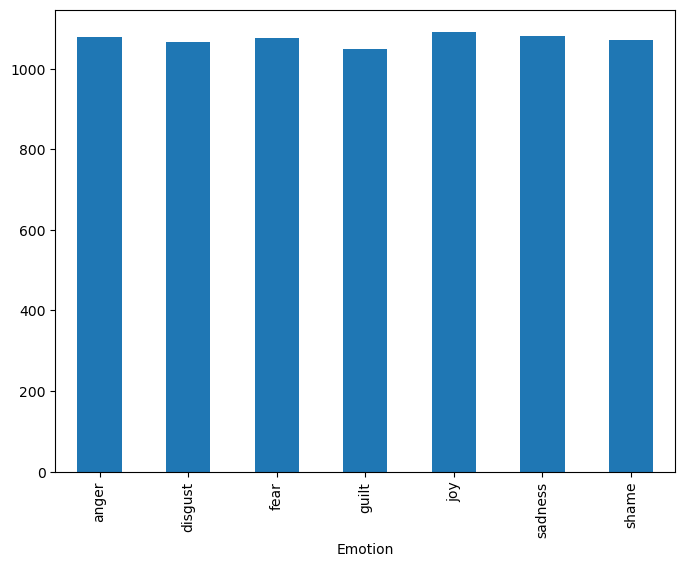

In [47]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,6)) 
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0) 
plt.show()

In [81]:
new_df['text']
new_df['emotion']

KeyError: 'text'

In [ ]:
#######PUUUNNNNYYAAAA IIIRRRHHHAAAMMMM

In [117]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def getTokenizedList(input_df): 
    tokenizedList = [] 
    for i in range(len(input_df)): 
        curText = input_df.iloc[i, 1]  # Menggunakan iloc dengan benar
        curText = curText.replace('\n', '') 
        curTokenized = word_tokenize(curText) 
        tokenizedList.append(curTokenized) 

    tokenizedListWithoutPunct = [] 
    punctList = list(string.punctuation) 
    for i in range(len(tokenizedList)): 
        curList = tokenizedList[i] 
        newList = []  # list tanpa tanda baca 
        for word in curList: 
            if word not in punctList: 
                newList.append(word.lower()) 
        tokenizedListWithoutPunct.append(newList) 

    # Stemming 
    mystemmer = PorterStemmer() 
    tokenizedStemmed = [] 
    for i in range(len(tokenizedListWithoutPunct)): 
        curList = tokenizedListWithoutPunct[i] 
        newList = [] 
        for word in curList: 
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList) 

    return tokenizedStemmed

In [191]:
def transformSentence (sent): 
    s = [] 
    sent=sent.replace('\n','')
    sentTokenized=word_tokenize(sent) 
    s.append(sentTokenized) 
    sWithoutPunct = [] 
    punctList = list(string.punctuation) 
    curSentList = s[0] 
    newSentList = [] 
    for word in curSentList: 
        if (word.lower() not in punctList): 
            newSentList.append(word.lower()) 
    sWithoutPunct.append(newSentList) 
    mystemmer = PorterStemmer()
    tokenziedStemmed = [] 
    for i in range(0,len(sWithoutPunct)): 
        curList=sWithoutPunct[i] 
        newList=[] 
        for word in curList: 
        	newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList) 
    return tokenziedStemmed


In [119]:
new_df['text'] = getTokenizedList(df)
#new_df['text']

In [123]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'], new_df[ 'Emotion'], test_size=.3, random_state=1)

In [127]:
#Function to pass the list to the Tfidf vectorizer 
def returnPhrase(inputList): 
    return inputList

In [133]:
#Extracting features for Naive Bayes

myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [141]:
curAlpha=0.33 #smoothing factor in NB 
NBClassifier=MultinomialNB(alpha=curAlpha) 
NBClassifier.fit(transformedTrain,Y_train) 
myPredTest=NBClassifier.predict(transformedTest) 
print('Best Acc Naive Bayes') 
#print(curAlpha) 
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.5121951219512195


In [147]:
print('metrics classification report : naive bayes')
print(metrics.classification_report(Y_test, myPredTest))

metrics classification report : naive bayes
              precision    recall  f1-score   support

       anger       0.41      0.43      0.42       331
     disgust       0.65      0.46      0.54       324
        fear       0.58      0.66      0.62       311
       guilt       0.34      0.52      0.41       299
         joy       0.61      0.59      0.60       323
     sadness       0.66      0.54      0.59       351
       shame       0.45      0.40      0.42       316

    accuracy                           0.51      2255
   macro avg       0.53      0.51      0.51      2255
weighted avg       0.53      0.51      0.52      2255



In [213]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [225]:
curC=2 #cost factor in SVM 
SVMClassifier=svm.LinearSVC(C=curC) 
SVMClassifier.fit(transformedTrain, Y_train) 
myPredTest=SVMClassifier.predict (transformedTest) 
print('Best Acc SVM') 
#print(curC) 
print(np.sum(myPredTest==Y_test)/len(Y_test))

C:\Users\irham\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best Acc SVM
0.5627494456762749


In [193]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [203]:
#To predict the emotion of a sentence using SVM 
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence (sent)).toarray())
    return sentPred

In [227]:
sent =  "I love you to the moon and back" 
#Printing the predicted emotion 
print("Naive bayes prediction") 
print(predictSentNB(sent)) 
print("SVM prediction")
print(predictSentSVM(sent))

Naive bayes prediction
['disgust']
SVM prediction
['guilt']


In [281]:
from sklearn.metrics import confusion_matrix

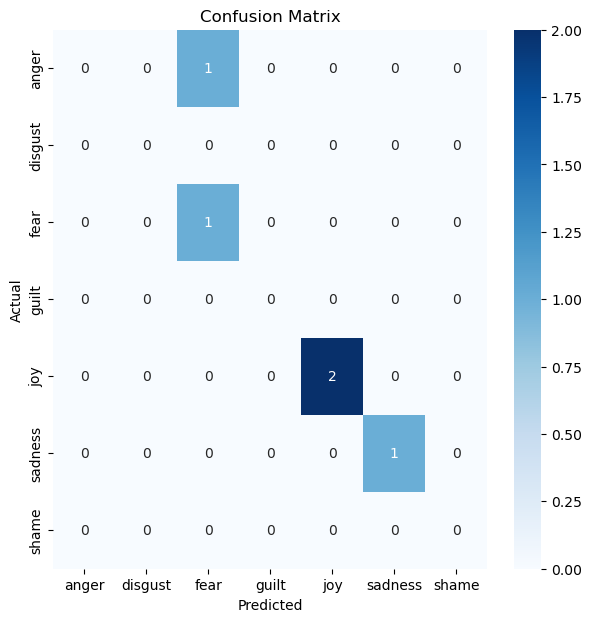

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Misalkan Y_test dan myPredTest sudah didefinisikan
Y_test = np.array(['joy', 'anger', 'fear', 'joy', 'sadness'])  # Contoh label sebenarnya
myPredTest = np.array(['joy', 'fear', 'fear', 'joy', 'sadness'])  # Contoh prediksi

labels = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']
cm = confusion_matrix(Y_test, myPredTest, labels=labels)

# print (cm)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
